# Credit card fraud detection

In this project we are going to use CNN model to detect credit card fraud.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Convolution1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [3]:
#importing csv file
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Explore data

In [4]:
#counting null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
#droping duplicates
df.drop_duplicates(keep='first', inplace=True)
print(df.shape)

(283726, 31)


<AxesSubplot:xlabel='Class', ylabel='count'>

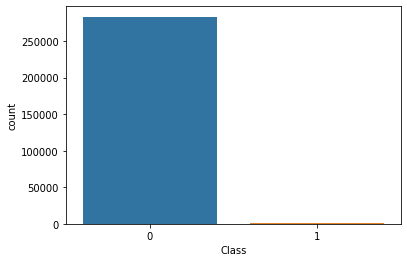

In [8]:
sns.countplot(x="Class",data=df)

In [9]:
df["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

We can see that our dataset is unbalanced. We have a lot more not fraud then fraud credit card. Later we will use SMOTE techique to balance our dataset.

## Preparing dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Defining features and  target column
X = df.drop(columns="Class", axis =1)
y = df["Class"]

### Balance dataset

In [12]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')      
X_s, y_s = smote.fit_resample(X, y)

In [13]:
#Splitting our data on train and test
train_X,test_X,train_y,test_y=train_test_split(X_s,y_s,train_size=0.8,random_state=0)

In [14]:
train_y.value_counts()

0    226792
1    226412
Name: Class, dtype: int64

In [15]:
train_X.shape,test_X.shape

((453204, 30), (113302, 30))

### Scaling dataset

In [16]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scaler=MinMaxScaler()

In [17]:
train_X=scaler.fit_transform(train_X)
test_X=scaler.transform(test_X)

In [18]:
train_y=train_y.to_numpy()
test_y=test_y.to_numpy()

### Reshaping features

Because CNN model uses 3D array we need to resape out training features.

In [19]:
train_X=train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X=test_X.reshape(test_X.shape[0],test_X.shape[1],1)

In [20]:
train_X.shape,test_X.shape

((453204, 30, 1), (113302, 30, 1))

In [21]:
model = Sequential()
model.add(Convolution1D(32,2,activation="relu",input_shape=train_X[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Convolution1D(64,2,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.7))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.7))

model.add(Dense(1,activation="sigmoid"))

In [22]:
model.compile(optimizer=Adam(lr=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

In [23]:
history=model.fit(train_X,train_y,epochs=20,validation_data=(test_X,test_y),verbose=1)

Epoch 1/20
14163/14163 [==============================] - 119s 8ms/step - loss: 0.2873 - accuracy: 0.8904 - val_loss: 0.0873 - val_accuracy: 0.9692
Epoch 2/20
14163/14163 [==============================] - 117s 8ms/step - loss: 0.1233 - accuracy: 0.9595 - val_loss: 0.0860 - val_accuracy: 0.9684
Epoch 3/20
14163/14163 [==============================] - 119s 8ms/step - loss: 0.1131 - accuracy: 0.9624 - val_loss: 0.0806 - val_accuracy: 0.9721
Epoch 4/20
14163/14163 [==============================] - 119s 8ms/step - loss: 0.1079 - accuracy: 0.9638 - val_loss: 0.0762 - val_accuracy: 0.9733
Epoch 5/20
14163/14163 [==============================] - 120s 9ms/step - loss: 0.1030 - accuracy: 0.9653 - val_loss: 0.0779 - val_accuracy: 0.9714
Epoch 6/20
14163/14163 [==============================] - 121s 9ms/step - loss: 0.1012 - accuracy: 0.9657 - val_loss: 0.0720 - val_accuracy: 0.9747
Epoch 7/20
14163/14163 [==============================] - 123s 9ms/step - loss: 0.1000 - accuracy: 0.9666 - val_

In [24]:
def learning_curve (history,epoch):
    epoch_range=range(1,epoch+1)
    plt.plot(epoch_range,history.history["accuracy"])
    plt.plot(epoch_range,history.history["val_accuracy"])
    plt.title("Model accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"])
    plt.show()
    
    plt.plot(epoch_range,history.history["loss"])
    plt.plot(epoch_range,history.history["val_loss"])
    plt.title("Model loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train","Val"])
    plt.show()
    

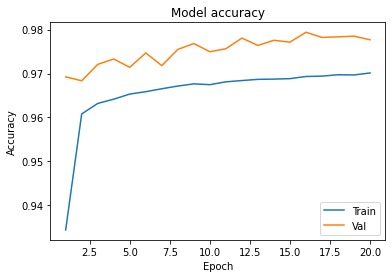

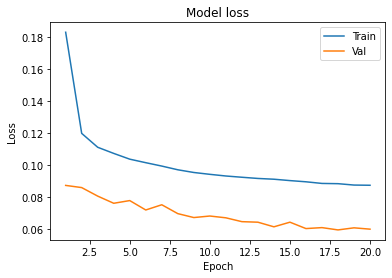

In [25]:
learning_curve(history,20)

We can see our model is doing very well. We have 96.97% accuracy on training set and 97.77% on test set. This could mean a little overfitting. So we could just raise number of epoch to solve this.

### Adding MaxPooling

In [26]:
model = Sequential()
model.add(Convolution1D(32,2,activation="relu",input_shape=train_X[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Convolution1D(64,2,activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.7))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.7))

model.add(Dense(1,activation="sigmoid"))

In [27]:
model.compile(optimizer=Adam(lr=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

In [28]:
history=model.fit(train_X,train_y,epochs=50,validation_data=(test_X,test_y),verbose=1)

Epoch 1/50
14163/14163 [==============================] - 89s 6ms/step - loss: 0.5377 - accuracy: 0.8294 - val_loss: 0.0913 - val_accuracy: 0.9692
Epoch 2/50
14163/14163 [==============================] - 86s 6ms/step - loss: 0.1290 - accuracy: 0.9585 - val_loss: 0.0821 - val_accuracy: 0.9713
Epoch 3/50
14163/14163 [==============================] - 87s 6ms/step - loss: 0.1127 - accuracy: 0.9636 - val_loss: 0.0782 - val_accuracy: 0.9723
Epoch 4/50
14163/14163 [==============================] - 87s 6ms/step - loss: 0.1064 - accuracy: 0.9650 - val_loss: 0.0770 - val_accuracy: 0.9722
Epoch 5/50
14163/14163 [==============================] - 87s 6ms/step - loss: 0.1031 - accuracy: 0.9661 - val_loss: 0.0793 - val_accuracy: 0.9711
Epoch 6/50
14163/14163 [==============================] - 87s 6ms/step - loss: 0.1008 - accuracy: 0.9669 - val_loss: 0.0731 - val_accuracy: 0.9737
Epoch 7/50
14163/14163 [==============================] - 92s 6ms/step - loss: 0.1002 - accuracy: 0.9666 - val_loss: 0

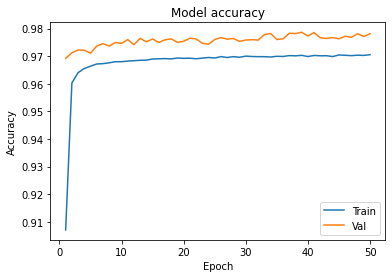

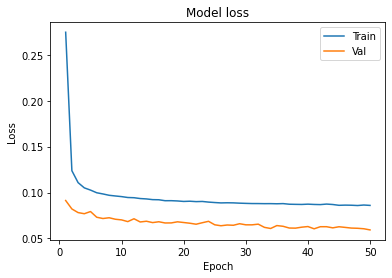

In [29]:
learning_curve(history,50)

After adding MaxPooling layer we got a little better result on training and test set. Training set accuracy 97.05% and test set accuracy 97.82%.